In [38]:
import csv
import numpy as np

with open('hitters.x.csv', 'r') as f:
    X_colnames = next(csv.reader(f))

X = np.loadtxt('hitters.x.csv', delimiter=',', skiprows=1)
y = np.loadtxt('hitters.y.csv', delimiter=',', skiprows=1)
n, d = np.size(X, 0), np.size(X, 1)

In [39]:
scale = np.diag(1 / np.sqrt(np.var(X, axis=1)))
X, y = scale @ X, scale @ y
X = np.c_[np.ones(n), X]
d = d + 1


In [40]:
import matplotlib.pyplot as plt
import numpy.linalg as lg

lam = np.logspace(-3, 7, num=100, dtype=int)
I = np.diag(np.r_[np.array([0]), np.ones(d-1)])
theta = np.array([lg.norm(lg.solve( (X.T @ X + lam[i]*I), X.T @ y )) for i in range(100)])

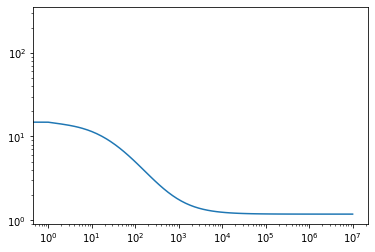

In [41]:
fig, ax = plt.subplots()
ax.plot(lam, theta)
ax.set_xscale('log')
ax.set_yscale('log')

In [42]:
Xy = np.c_[X, y]
X = np.random.shuffle(Xy)
X, y = Xy[:, 0:-1], Xy[:, -1]

k = 5
m = int(n / k)
err = np.zeros((100, k))
theta_cross = np.zeros((d, k))

In [43]:
for i in range(k):
    val = np.linspace(m*i, m*(i+1) - 1, num=m-1, dtype=int)
    train = np.r_[np.arange(m*i), (np.arange(n-m*(i+1)) + m*(i+1))]
    X_train, y_train = X[train, :], y[train]

    theta = [lg.solve(X_train.T @ X_train + lam[i]*I, X_train.T @ y_train) for i in range(100)]
    err[:, i] = [lg.norm(y[val] - X[val, :] @ theta[i]) for i in range(100)]
    theta_cross[:, i] = theta[np.argmin(err[:, i])]

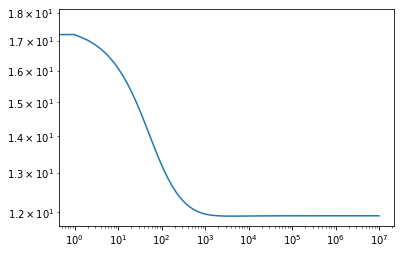

In [44]:
err = np.mean(err, axis=1)
fig, ax = plt.subplots()
ax.plot(lam, err)
ax.set_xscale('log')
ax.set_yscale('log')

In [86]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as lg
from numpy import random as r

In [87]:
X = np.loadtxt('hitters.x.csv', delimiter=',', skiprows=1)
with open('hitters.x.csv', 'r') as f:
    X_colnames = next(csv.reader(f))

# load salaries
y = np.loadtxt('hitters.y.csv', delimiter=',', skiprows=1)

In [88]:
X = (X - X.mean(0)[None, :]) / X.std(0)[None, :]
y = (y - y.mean()) / y.std()
X = np.column_stack((np.ones(X.shape[0]), X))

In [89]:
def ridge(X, y, lam):
    I = np.eye(X.shape[1])
    I[0, 0] = 0
    return lg.solve( X.T @ X + lam*I, X.T @ y )

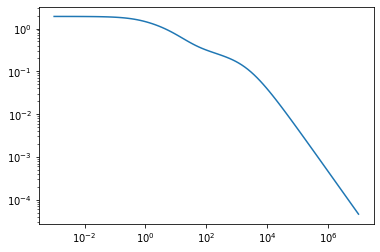

In [90]:
lams = np.logspace(-3, 7, num=100)
thetas = np.array([ ridge(X, y, lam) for lam in lams ])

I = np.eye(X.shape[1])
I[0, 0] = 0
thetas = [lg.norm( I @ theta ) for theta in thetas]
plt.loglog(lams, thetas)

In [91]:
def cv_ridge(X, y, lam, k=5):
    m = X.shape[0] // k
    Xy = np.column_stack((X, y))
    r.shuffle(Xy)
    X, y = Xy[:, 0:-1], Xy[:, -1]

    theta, errors = [], []

    for i in range(k):
        val = np.zeros(X.shape[0], dtype=bool)
        val[m*i : m*(i+1) - 1] = True
        train = np.logical_not(val)

        theta = ridge( X[train, :], y[train], lam )
        errors.append(lg.norm( y[val] - X[val, :] @ theta ))
        # ((y[val] - X[val, :] @ theta)**2).mean()
    return np.mean(errors)

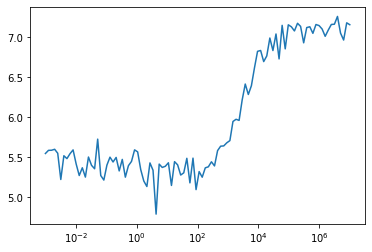

In [92]:
cv_errors = [cv_ridge(X, y, lam) for lam in lams]
plt.semilogx(lams, cv_errors)

In [58]:
np.column_stack((X, y))[:, 0:-1].shape

(263, 20)

In [70]:
Xy = np.column_stack((X, y))
r.shuffle(Xy)
X, y = Xy[:, 0:-1], Xy[:, -1]

In [71]:
y

array([ 630.   ,  110.   ,  595.   ,   86.5  ,  420.   ,  750.   ,
        250.   ,  300.   , 1200.   , 1940.   ,  275.   ,  100.   ,
       1300.   ,  120.   , 1000.   ,  240.   ,  450.   ,  725.   ,
        245.   ,  160.   ,  950.   ,  875.   ,  933.333,  670.   ,
       1861.46 ,  675.   ,  277.5  ,  385.   ,  150.   ,   75.   ,
        385.   ,  305.   ,  480.   ,  200.   ,  512.5  ,  700.   ,
        625.   ,  155.   , 1900.   , 1150.   ,   90.   ,  165.   ,
         75.   ,   95.   ,  140.   ,   68.   ,  250.   ,  100.   ,
        657.   ,  430.   ,  475.   , 1043.33 , 1300.   , 1300.   ,
       2460.   ,  277.5  ,  600.   ,  297.5  ,  600.   ,  137.   ,
        875.   ,  530.   ,  400.   ,  100.   ,  535.   ,  400.   ,
       1600.   ,  225.   , 1925.57 ,  773.333, 1100.   ,  550.   ,
        100.   ,  490.   ,  300.   ,   75.   ,  733.333,  960.   ,
        525.   ,  135.   , 1175.   ,  110.   ,  195.   ,  500.   ,
       1041.67 ,  235.   ,  750.   ,   80.   ,  140.   ,  560.